# Assignment 5 Project for Course BAN6420 (Programming in Python and R)

- **Task 0** : PCA Implementation - Utilize PCA to demonstrate how essential variables can be acquired from the cancer dataset available from sklearn.datasets
- **Task 1** : Dimensionality Reduction - Reduce the dataset into 2 PCA components for the project.
- **Task 2** : Bonus Point (Optional) - Implement logistic regression for prediction


### <u>1.0 Intro</u>
In this project we are going to analyze the different cases of breast cancer at Anderson Cancer Center using the dataset from sklearn.datasets. Our major task is to extract the essential features in the dataset by decomposing the data into two prinicpal components. The Hospital wants to classify the cancers cases as either malignant (cancerous) or benign (non-cancerous). The model will now be able to make prediction using the digital images of breast tissue.

In [219]:
# Import the neccessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### <u>1.1 Input Data</u>
First, we need to read breast cancer dataset

In [220]:
# Load all the atributes of the dataset Bunch object
cancer_data = load_breast_cancer(return_X_y=False, as_frame=False)

### <u>1.2 Data Exploration</u>
Then, we need to get some insights into the features of the breast cancer datasets

In [221]:
# Display some of the attributes of the Bunch dataset
print(cancer_data.feature_names)
print(cancer_data.target_names)
print(cancer_data.DESCR)
print(cancer_data.data)
print(cancer_data.target)
print(type(cancer_data))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    -

### <u>2.0 Data Transformation</u>
First, we need to transform the data using Scaling Technique

In [222]:
# Access data and target of the cancer data features
feature_data = cancer_data.data
feature_target = cancer_data.target

# Data Transformation: - Standardize the dataset using Scaling technique to ensure all features contribute equally.
scaler = StandardScaler()
scaled_feature_data = scaler.fit_transform(X=feature_data)

### <u>2.1 Data Decomposition -> Dimentionality Reduction of the Dataset</u>

Next, **Task 0** : PCA Implementation - Utilize PCA to demonstrate how essential variables can be acquired from the cancer dataset available from sklearn.datasets

In [223]:
# Using PCA to decompose scaled_cancer_data multivariate dataset into two components
pca = PCA(n_components=2)
scaled_feature_data_pca = pca.fit_transform(scaled_feature_data)

### <u>2.2 Essential Variables of the Breast cancer dataset</u>

Next, we analyze the PCA compoanents attribute and form a dataframe object.

In [224]:
# Analyze the PCA components to identify essential variables
pca_components = pd.DataFrame(pca.components_, columns=cancer_data.feature_names)

### <u>2.3 Display the Essential Variables of the two Principal Components</u>

Lastly, we go ahead and display the most essential variables in the two principal Components.

In [225]:
# Display the top contributing features to the first few components
for i in range(2):
    print(f"\nTop contributing features to Principal Component {i+1}:")
    print(pca_components.iloc[i].sort_values(ascending=False).head(5))


Top contributing features to Principal Component 1:
mean concave points     0.260854
mean concavity          0.258400
worst concave points    0.250886
mean compactness        0.239285
worst perimeter         0.236640
Name: 0, dtype: float64

Top contributing features to Principal Component 2:
mean fractal dimension     0.366575
fractal dimension error    0.280092
worst fractal dimension    0.275339
compactness error          0.232716
smoothness error           0.204430
Name: 1, dtype: float64


### <u>3.0 Implement Logistic Regression for model prediction</u>

First, we split the data into training set and test set

In [226]:
# Split the data into training set and test set
feature_train, feature_test, target_train, target_test = train_test_split(scaled_feature_data_pca, feature_target, test_size=0.3, random_state=42)

### <u>3.1 Model Creation and Training</u>

Then, we create a LogisticRegression model object and we fit the model with train dataset

In [227]:
# Implement Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(feature_train, target_train)


LogisticRegression()

### <u>3.2 Model Testing</u> - 

Test the model with 'test data' to perform a prediction and classify the digital images of breast tissue 

In [228]:
# Test the Cancer model  
cancer_predictor = log_reg.predict(feature_test)

### <u>3.3 Model Evaluation</u> -

Next, we calculate the model accuracy to evaluate the level of it's accuracy at predicting digital images of breast tissue 

In [229]:
# To calculate the accuracy score
accuracy_test = accuracy_score(y_true=target_test, y_pred=cancer_predictor)
print(accuracy_test)

0.9707602339181286


 #####    <u>Accuracy Score Explanation</u>
- The model accuracy is 97.08% which is an excellent score !!!
- This shows that the Logistic regression model is performing very well on the test set. 
- The model is correctly predicting the breast cancer diagnosis in about 97% of cases.

#### <u>Final Conclusion</u>

From the breast cancer dataset, we have been able to standardize the data features of the Bunch dataset and we carried out dimensionality reduction on the dataset and decomposed it into two principal components. Next, we extracted the essential variables from the two principal components.

We now created a model a Regression Model using the LogisticRegression technique. This model will serve as a classifier to predict whther a patient is malignant (cancerous) or benign (non-cancerous) using features extracted from digital images of breast tissue of the petient. The model has been fitted and trained.

Lastly, we calculated the accuracy score of the LogisticRegression model to determine how efficient and precise it can be. We made use of "accuracy_score" function to do the calculation. The accuracy score gives us 97.08% which is an excellent score. This means the can correctly predict and classify the type of cancer in a person using the digital images of breast tissue


# Data Visualization of the Prinicipal Components

In [230]:
# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Examine the explained variance ratios
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Cumulative variance ratio:", cumulative_variance)

Explained variance ratio: [0.44272026 0.18971182]
Cumulative variance ratio: [0.44272026 0.63243208]


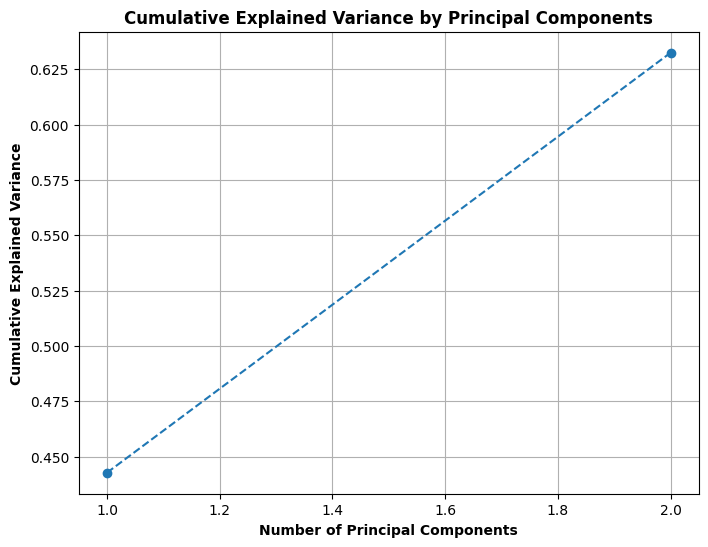

In [231]:
# Plot cumulative explained variance to visualize how many components capture most of the variance
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.title(label='Cumulative Explained Variance by Principal Components', fontweight='bold')
plt.xlabel(xlabel='Number of Principal Components', fontweight='bold')
plt.ylabel(ylabel='Cumulative Explained Variance', fontweight='bold')
plt.grid(visible=True, axis="both")
plt.show()